In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense,Input
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential,Model
import keras.utils as ku 
import numpy as np

In [0]:
data = """У лукоморья дуб зелёный;
Златая цепь на дубе том:
И днём и ночью кот учёный
Всё ходит по цепи кругом;
Идёт направо - песнь заводит,
Налево - сказку говорит.
Там чудеса: там леший бродит,
Русалка на ветвях сидит;
Там на неведомых дорожках
Следы невиданных зверей;
Избушка там на курьих ножках
Стоит без окон, без дверей;
Там лес и дол видений полны;
Там о заре прихлынут волны
На брег песчаный и пустой,
И тридцать витязей прекрасных
Чредой из вод выходят ясных,
И с ними дядька их морской;
Там королевич мимоходом
Пленяет грозного царя;
Там в облаках перед народом
Через леса, через моря
Колдун несёт богатыря;
В темнице там царевна тужит,
А бурый волк ей верно служит;
Там ступа с Бабою Ягой
Идёт, бредёт сама собой,
Там царь Кащей над златом чахнет;
Там русский дух... там Русью пахнет!
И там я был, и мёд я пил;
У моря видел дуб зелёный;
Под ним сидел, и кот учёный
Свои мне сказки говорил."""

In [0]:
tokenizer = Tokenizer()

In [0]:
def dataset_preparation(data):
	corpus = data.lower().split("\n")
  
	tokenizer.fit_on_texts(corpus)
	total_words = len(tokenizer.word_index) + 1

	input_sequences = []
	for line in corpus:
		token_list = tokenizer.texts_to_sequences([line])[0]
		for i in range(1, len(token_list)):
			n_gram_sequence = token_list[:i+1]
			input_sequences.append(n_gram_sequence)

	max_sequence_len = max([len(x) for x in input_sequences])
	input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

	predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
	label = ku.to_categorical(label, num_classes=total_words)

	return predictors, label, max_sequence_len, total_words

In [0]:
def create_model(predictors, label, max_sequence_len, total_words):
	
	model = Sequential()
	model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
	model.add(LSTM(150, return_sequences = True))
	model.add(LSTM(100))
	model.add(Dense(total_words, activation='softmax'))

	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
	model.fit(predictors, label, epochs=100, verbose=1, callbacks=[earlystop])
	return model 

In [0]:
def generate_text(seed_text, next_words, max_sequence_len):
	for _ in range(next_words):
		token_list = tokenizer.texts_to_sequences([seed_text])[0]
		token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
		predicted = model.predict_classes(token_list, verbose=0)
		
		output_word = ""
		for word, index in tokenizer.word_index.items():
			if index == predicted:
				output_word = word
				break
		seed_text += " " + output_word
	return seed_text

In [0]:
predictors, label, max_sequence_len, total_words = dataset_preparation(data)
model = create_model(predictors, label, max_sequence_len, total_words)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
124/124 [==============================] - 1s 11ms/step - loss: 4.7968 - acc: 0.0081
Epoch 2/100
124/124 [==============================] - 0s 1ms/step - loss: 4.7933 - acc: 0.0403
Epoch 3/100
 32/124 [======>.......................] - ETA: 0s - loss: 4.7864 - acc: 0.0938

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


124/124 [==============================] - 0s 1ms/step - loss: 4.7899 - acc: 0.0403
Epoch 4/100
124/124 [==============================] - 0s 1ms/step - loss: 4.7845 - acc: 0.0403
Epoch 5/100
124/124 [==============================] - 0s 1ms/step - loss: 4.7757 - acc: 0.0403
Epoch 6/100
124/124 [==============================] - 0s 1ms/step - loss: 4.7574 - acc: 0.0403
Epoch 7/100
124/124 [==============================] - 0s 1ms/step - loss: 4.7140 - acc: 0.0403
Epoch 8/100
124/124 [==============================] - 0s 1ms/step - loss: 4.6706 - acc: 0.0403
Epoch 9/100
124/124 [==============================] - 0s 1ms/step - loss: 4.6459 - acc: 0.0403
Epoch 10/100
124/124 [==============================] - 0s 1ms/step - loss: 4.6261 - acc: 0.0403
Epoch 11/100
124/124 [==============================] - 0s 1ms/step - loss: 4.6076 - acc: 0.0484
Epoch 12/100
124/124 [==============================] - 0s 1ms/step - loss: 4.5959 - acc: 0.0403
Epoch 13/100
124/124 [===========================

In [0]:
print(generate_text("Избушка там", 3, max_sequence_len))

Избушка там там курьих ножках


In [0]:
print(generate_text("У лукоморья", 2, max_sequence_len))

У лукоморья на зелёный


In [0]:
print(generate_text("Златая цепь", 3, max_sequence_len))

Златая цепь на там и


In [0]:
embl = model.layers[0]

In [0]:
from sklearn.decomposition import PCA
from matplotlib.pylab import plt

In [0]:
vl = PCA(n_components=2).fit_transform(embl.get_weights()[0])

In [0]:
viz_words=['дуб','дух','дядька','златом','златая','цепь','волк']

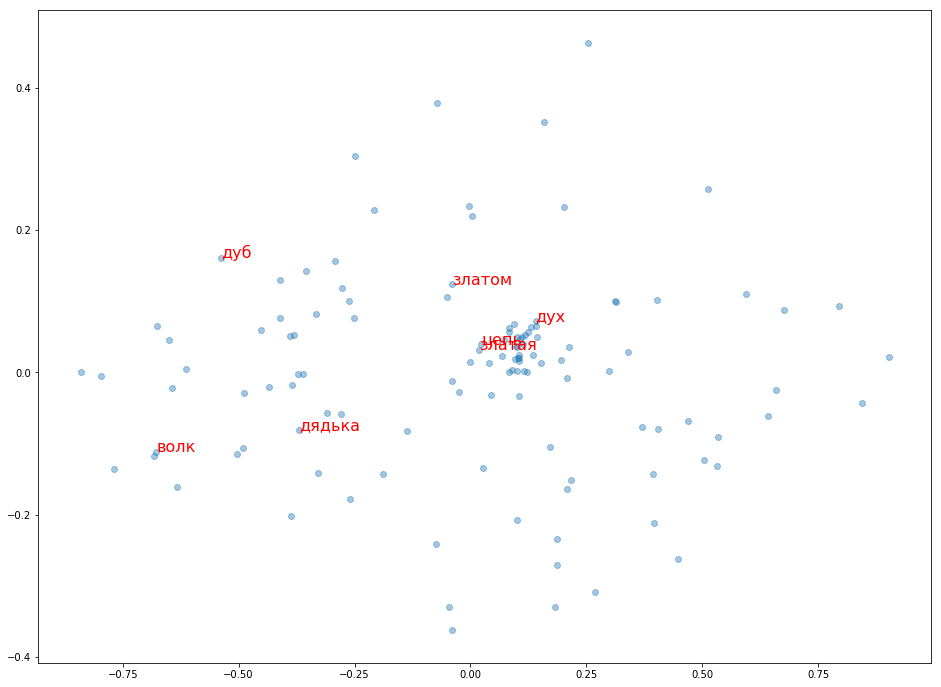

In [0]:
plt.figure(figsize=(16,12))
plt.scatter(vl[:,0],vl[:,1],alpha=0.4)
for word in viz_words:
  ind = tokenizer.word_index[word]
  plt.text(vl[ind,0],vl[ind,1],word,color='red',size=16)